### Notes

Hopkins and Oxford datasets differ by a day but are the same thing (bc of updating at end of day vs. beginning of day).

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# HOPKINS — https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
hopkins_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv").iloc[:, 4:].sum()

In [3]:
# OXFORD – https://cowid.netlify.com/data/full_data.csv
oxford_confirmed = pd.read_csv("https://cowid.netlify.com/data/full_data.csv")
oxford_confirmed = oxford_confirmed.loc[oxford_confirmed["location"] == "World"].loc[:, "total_cases"]

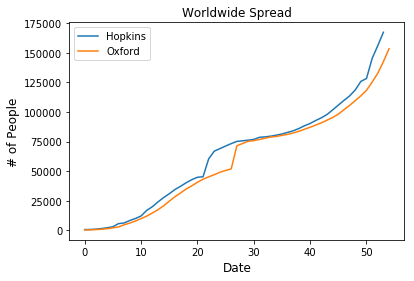

In [4]:
plt.title("Worldwide Spread", fontsize = 12)
plt.plot([i for i in range(len(hopkins_confirmed))], list(hopkins_confirmed), label = 'Hopkins')
plt.plot([i for i in range(len(oxford_confirmed))], list(oxford_confirmed), label = 'Oxford')

plt.xlabel("Date", fontsize = 12)
plt.ylabel("# of People", fontsize = 12)
plt.legend()

plt.show()

---

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
oxford_confirmed = pd.read_csv("https://cowid.netlify.com/data/full_data.csv")
oxford = oxford_confirmed.loc[oxford_confirmed["location"] == "United States"].loc[:, "total_cases"]

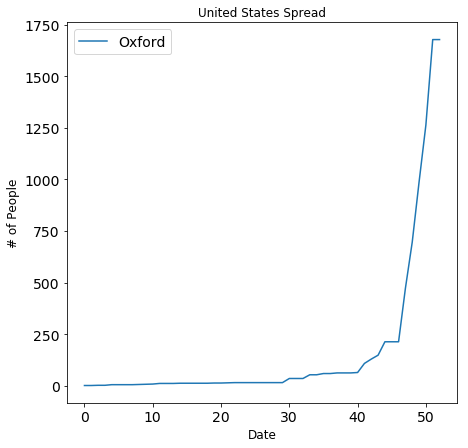

In [10]:
plt.title("United States Spread", fontsize = 12)
plt.plot([i for i in range(len(oxford[:]))], list(oxford[:]), label = 'Oxford')

plt.xlabel("Date", fontsize = 12)
plt.ylabel("# of People", fontsize = 12)
plt.legend()

plt.show()

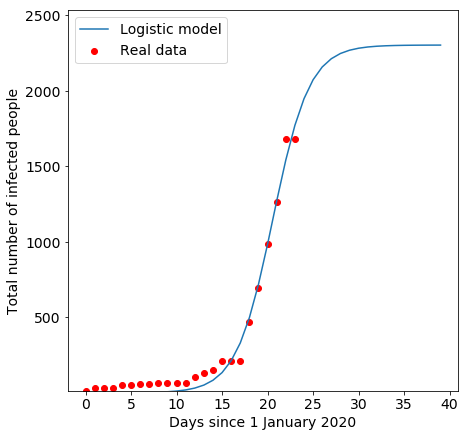

In [11]:
def logistic_model(x,a,b,c):
    return(c / (1 + np.exp(-(x - b) / a)))

x = [i for i in range(len(oxford[29:]))]
y = list(oxford[29:])

fit = curve_fit(logistic_model,x,y)

a = fit[0][0]
b = fit[0][1]
c = fit[0][2]

sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]

pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )

plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()